In [75]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model
import matplotlib.pyplot as plt

In [39]:
# Load data
housing_data = pd.read_csv("housing.csv")

In [40]:
housing_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [41]:
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [42]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [43]:
housing_data["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

<AxesSubplot:>

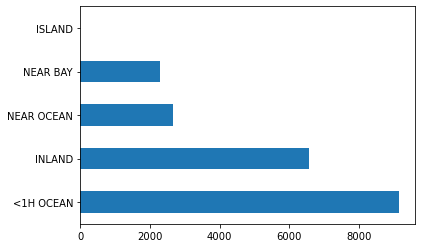

In [44]:
housing_data["ocean_proximity"].value_counts().plot(kind="barh")

In [45]:
housing_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


<AxesSubplot:>

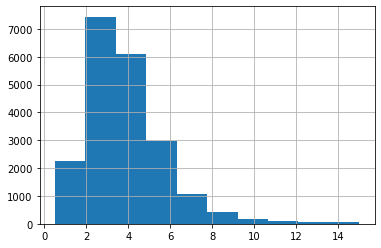

In [46]:
housing_data["median_income"].hist()

In [47]:
housing_data["income_cat"] = pd.cut(housing_data["median_income"], bins=[0., 1.5, 3., 4.5, 6., np.inf], labels = [1,2,3,4,5])
housing_data["income_cat"].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

<AxesSubplot:>

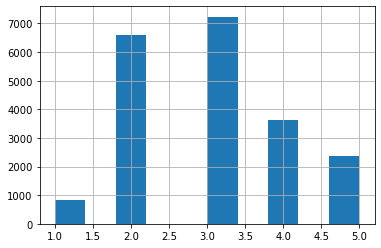

In [48]:
housing_data["income_cat"].hist()

In [49]:
# Defining y as label and everything exept y as predictors
y = housing_data["median_house_value"]
X = housing_data.drop("median_house_value", axis=1)
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY,3
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND,2
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND,2
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND,2
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND,2


In [50]:
#Spliting Dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
10088,-117.97,33.94,34.0,1632.0,263.0,690.0,268.0,5.5608,<1H OCEAN,4
6456,-118.05,34.11,48.0,1410.0,304.0,677.0,274.0,3.2596,INLAND,3
4930,-118.25,33.99,42.0,2261.0,574.0,2496.0,527.0,1.5556,<1H OCEAN,2
3248,-119.82,36.19,33.0,1293.0,272.0,694.0,229.0,2.0221,INLAND,2
14911,-117.05,32.61,21.0,6034.0,1205.0,3795.0,1146.0,3.2633,NEAR OCEAN,3
...,...,...,...,...,...,...,...,...,...,...
6574,-118.16,34.20,43.0,1810.0,343.0,988.0,307.0,3.8203,<1H OCEAN,3
14218,-117.05,32.68,19.0,1469.0,275.0,1010.0,292.0,3.5664,NEAR OCEAN,3
14286,-117.12,32.72,36.0,6096.0,1285.0,3093.0,1229.0,3.3700,NEAR OCEAN,3
4016,-118.59,34.15,29.0,2023.0,330.0,747.0,304.0,6.7694,<1H OCEAN,5


<AxesSubplot:>

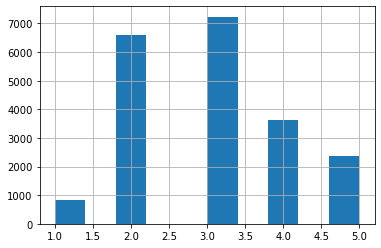

In [51]:
# Seeing if both training and test has similar distribution like original dataset if otherwise use stratisfied split 
# Original Dataset distribution
housing_data["income_cat"].hist()

<AxesSubplot:>

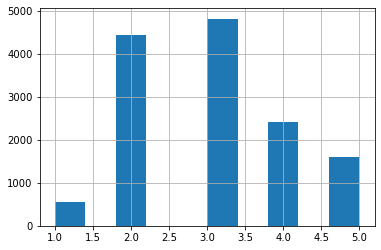

In [52]:
X_train["income_cat"].hist()
# Train Dataset distribution

<AxesSubplot:>

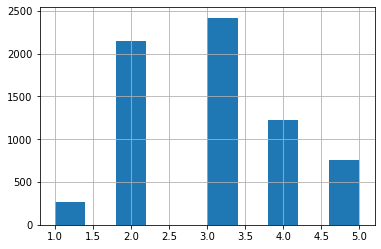

In [53]:
X_test["income_cat"].hist()
# Test Dataset distribution

In [54]:
# Another way is check the ratio of each corresponding columns are equal or not in each of the test and train data corresponding to original dataset, we see almost equal ratio
housing_data["income_cat"].value_counts()/len(housing_data)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [55]:
X_train["income_cat"].value_counts()/len(X_train)

3    0.348423
2    0.320581
4    0.175080
5    0.115780
1    0.040136
Name: income_cat, dtype: float64

In [56]:
X_test["income_cat"].value_counts()/len(X_test)

3    0.354962
2    0.315326
4    0.178802
5    0.111715
1    0.039196
Name: income_cat, dtype: float64

In [57]:
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
10088,-117.97,33.94,34.0,1632.0,263.0,690.0,268.0,5.5608,<1H OCEAN,4
6456,-118.05,34.11,48.0,1410.0,304.0,677.0,274.0,3.2596,INLAND,3
4930,-118.25,33.99,42.0,2261.0,574.0,2496.0,527.0,1.5556,<1H OCEAN,2
3248,-119.82,36.19,33.0,1293.0,272.0,694.0,229.0,2.0221,INLAND,2
14911,-117.05,32.61,21.0,6034.0,1205.0,3795.0,1146.0,3.2633,NEAR OCEAN,3
...,...,...,...,...,...,...,...,...,...,...
6574,-118.16,34.20,43.0,1810.0,343.0,988.0,307.0,3.8203,<1H OCEAN,3
14218,-117.05,32.68,19.0,1469.0,275.0,1010.0,292.0,3.5664,NEAR OCEAN,3
14286,-117.12,32.72,36.0,6096.0,1285.0,3093.0,1229.0,3.3700,NEAR OCEAN,3
4016,-118.59,34.15,29.0,2023.0,330.0,747.0,304.0,6.7694,<1H OCEAN,5


In [58]:
X_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
13850,-117.32,34.51,16.0,3072.0,612.0,1283.0,604.0,2.8929,INLAND,2
13760,-117.17,34.03,33.0,4583.0,648.0,1760.0,638.0,6.3308,INLAND,5
2828,-119.05,35.40,18.0,1894.0,319.0,846.0,317.0,3.8611,INLAND,3
8464,-118.33,33.91,35.0,1092.0,302.0,962.0,297.0,3.5903,<1H OCEAN,3
8031,-118.13,33.84,46.0,2439.0,429.0,944.0,374.0,4.2841,<1H OCEAN,3
...,...,...,...,...,...,...,...,...,...,...
4291,-118.30,34.10,36.0,2284.0,899.0,1964.0,839.0,1.9297,<1H OCEAN,2
1231,-120.57,38.35,17.0,1504.0,358.0,661.0,250.0,2.2604,INLAND,2
6999,-118.04,33.96,37.0,1948.0,395.0,1163.0,379.0,3.2250,<1H OCEAN,3
13860,-117.26,34.48,6.0,4632.0,753.0,1851.0,694.0,4.1933,INLAND,3


In [59]:
#Deleting income_cat column as we dont need it anymore
X_train = X_train.drop("income_cat", axis="columns")
X_test = X_test.drop("income_cat", axis="columns")

In [36]:
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
15206,-117.06,33.01,9.0,2470.0,417.0,904.0,427.0,4.4219,<1H OCEAN
5119,-118.29,33.96,31.0,4022.0,1208.0,3707.0,1007.0,1.3096,<1H OCEAN
19560,-120.99,37.61,39.0,512.0,132.0,443.0,127.0,1.2857,INLAND
15718,-122.43,37.78,10.0,2380.0,843.0,1245.0,789.0,1.3062,NEAR BAY
12055,-117.57,33.88,39.0,679.0,164.0,769.0,179.0,2.3036,INLAND
...,...,...,...,...,...,...,...,...,...
7285,-118.24,33.98,45.0,972.0,249.0,1288.0,261.0,2.2054,<1H OCEAN
3219,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,INLAND
14279,-117.13,32.71,38.0,993.0,246.0,760.0,205.0,1.1563,NEAR OCEAN
2524,-122.18,39.55,28.0,1471.0,259.0,673.0,246.0,3.2500,INLAND


In [60]:
X_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
13850,-117.32,34.51,16.0,3072.0,612.0,1283.0,604.0,2.8929,INLAND
13760,-117.17,34.03,33.0,4583.0,648.0,1760.0,638.0,6.3308,INLAND
2828,-119.05,35.40,18.0,1894.0,319.0,846.0,317.0,3.8611,INLAND
8464,-118.33,33.91,35.0,1092.0,302.0,962.0,297.0,3.5903,<1H OCEAN
8031,-118.13,33.84,46.0,2439.0,429.0,944.0,374.0,4.2841,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
4291,-118.30,34.10,36.0,2284.0,899.0,1964.0,839.0,1.9297,<1H OCEAN
1231,-120.57,38.35,17.0,1504.0,358.0,661.0,250.0,2.2604,INLAND
6999,-118.04,33.96,37.0,1948.0,395.0,1163.0,379.0,3.2250,<1H OCEAN
13860,-117.26,34.48,6.0,4632.0,753.0,1851.0,694.0,4.1933,INLAND


In [61]:
#Copying train data as we dont have to run whole code again if we mess up for vizualisation.
#Dont look test data as it may affect your decision making, concentrate only on train data now.
housing = X_train.copy()

In [64]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13828 entries, 10088 to 10760
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           13828 non-null  float64
 1   latitude            13828 non-null  float64
 2   housing_median_age  13828 non-null  float64
 3   total_rooms         13828 non-null  float64
 4   total_bedrooms      13680 non-null  float64
 5   population          13828 non-null  float64
 6   households          13828 non-null  float64
 7   median_income       13828 non-null  float64
 8   ocean_proximity     13828 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.1+ MB


In [65]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13828 entries, 10088 to 10760
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           13828 non-null  float64
 1   latitude            13828 non-null  float64
 2   housing_median_age  13828 non-null  float64
 3   total_rooms         13828 non-null  float64
 4   total_bedrooms      13680 non-null  float64
 5   population          13828 non-null  float64
 6   households          13828 non-null  float64
 7   median_income       13828 non-null  float64
 8   ocean_proximity     13828 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.1+ MB


array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>, <AxesSubplot:>]],
      dtype=object)

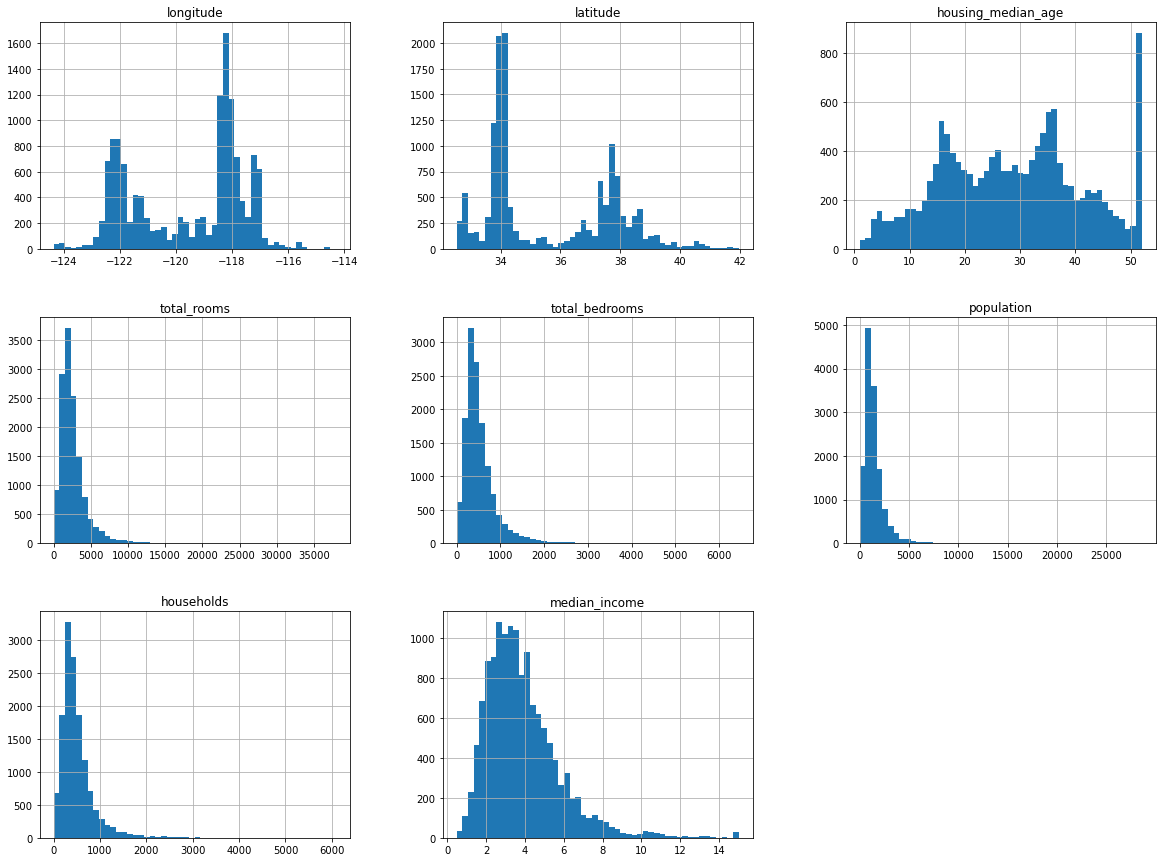

In [68]:
# Histogram
housing.hist(bins=50, figsize=(20,15))

In [69]:
# Correlation
housing.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
longitude,1.000000,-0.923752,-0.106723,0.044347,0.070977,0.097331,0.054143,-0.008057
latitude,-0.923752,1.000000,0.010862,-0.038586,-0.069708,-0.109954,-0.072082,-0.087978
housing_median_age,-0.106723,0.010862,1.000000,-0.358412,-0.318210,-0.296894,-0.299677,-0.124108
total_rooms,0.044347,-0.038586,-0.358412,1.000000,0.930491,0.862479,0.918518,0.197478
total_bedrooms,0.070977,-0.069708,-0.318210,0.930491,1.000000,0.886474,0.979224,-0.009069
population,0.097331,-0.109954,-0.296894,0.862479,0.886474,1.000000,0.916900,-0.001534
households,0.054143,-0.072082,-0.299677,0.918518,0.979224,0.916900,1.000000,0.009938
median_income,-0.008057,-0.087978,-0.124108,0.197478,-0.009069,-0.001534,0.009938,1.000000


<AxesSubplot:>

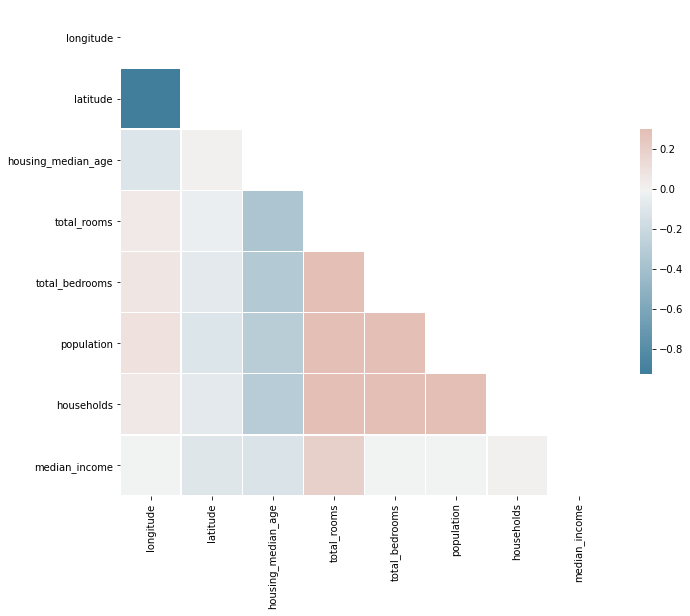

In [79]:
# Ploting correlation matrix as vizualisation is easy to understand than seeing values.
# From https://seaborn.pydata.org/examples/many_pairwise_correlations.html

import seaborn as sns
corr = housing.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11,9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})